# Card Catalog Spatial Frequencies

Installing geopandas on conda prompt: https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b run activate geo_env, jupyter notebook on conda prompt

Creating heatmaps in geopandas: https://medium.com/@m_vemuri/create-a-geographic-heat-map-of-the-city-of-toronto-in-python-cd2ae0f8be55

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [4]:
# Read shapefile and load in card catalog dataset
usa = gpd.read_file('tl_2020_us_state/tl_2020_us_state.shp')

df = pd.read_csv('C:/Users/heidi/Desktop/rl/Data--Rubenstein-Library-Card-Catalog/all_sorted_collection.csv')

In [3]:
# Sort alphabetically
usa = usa.sort_values(by=['STATEFP'])

In [4]:
# Store names and counts
# State Name	USPS Abbreviation	Traditional Abbreviation

states = {
"Alabama	AL	Ala.": 0,
"Alaska	AK	Alaska": 0,
"Arizona	AZ	Ariz.": 0,
"Arkansas	AR	Ark.": 0,
"California	CA	Calif.": 0,
"Colorado	CO	Colo.": 0,
"Connecticut	CT	Conn.": 0,
"Delaware	DE	Del.": 0,
"District of Columbia	DC	D.C.": 0,
"Florida	FL	Fla.": 0,
"Georgia	GA	Ga.": 0,
"Hawaii	HI	Hawaii": 0,
"Idaho	ID	Idaho": 0,
"Illinois	IL	Ill.": 0,
"Indiana	IN	Ind.": 0,
"Iowa	IA	Iowa": 0,
"Kansas	KS	Kans.": 0,
"Kentucky	KY	Ky.": 0,
"Louisiana	LA	La.": 0,
"Maine	ME	Maine": 0,
"Maryland	MD	Md.": 0,
"Massachusetts	MA	Mass.": 0,
"Michigan	MI	Mich.": 0,
"Minnesota	MN	Minn.": 0,
"Mississippi	MS	Miss.": 0,
"Missouri	MO	Mo.": 0,
"Montana	MT	Mont.": 0,
"Nebraska	NE	Neb. or Nebr.": 0,
"Nevada	NV	Nev.": 0,
"New Hampshire	NH	N.H.": 0,
"New Jersey	NJ	N.J.": 0,
"New Mexico	NM	N.Mex.": 0,
"New York	NY	N.Y.": 0,
"North Carolina	NC	N.C.": 0,
"North Dakota	ND	N.Dak.": 0,
"Ohio	OH	Ohio": 0,
"Oklahoma	OK	Okla.": 0,
"Oregon	OR	Ore. or Oreg.": 0,
"Pennsylvania	PA	Pa.": 0,
"Rhode Island	RI	R.I.": 0,
"South Carolina	SC	S.C.": 0,
"South Dakota	SD	S.Dak.": 0,
"Tennessee	TN	Tenn.": 0,
"Texas	TX	Tex. or Texas": 0,
"Utah	UT	Utah": 0,
"Vermont	VT	Vt.": 0,
"Virginia	VA	Va.": 0,
"Washington	WA	Wash.": 0,
"West Virginia	WV	W.Va.": 0,
"Wisconsin	WI	Wis. or Wisc.": 0,
"Wyoming	WY	Wyo.": 0,
"American Samoa	AS	Amer. Samoa": 0,
"Guam	GU	Guam": 0,
"Northern Mariana Islands	MP	M.P.": 0,
"Puerto Rico	PR	P.R.": 0,
"Virgin Islands	VI	V.I.": 0,
}

In [5]:
# Add state counts from catalog dataset
# Function to check if location is a state and add to counts
def find_state(s):
    # Check in list of states
    for key in states:
        if s in key:
            states[key] = states.get(key) + 1
    
# Loop through each main entry and try to gather location
for index, row in df.iterrows():
    if row['Coll_head'] == 1:
        # Try to get state name or abbreviation
        locs = str(row['Loc']).split(",")
        if len(locs) < 1:
            continue
        elif len(locs) == 1:
            find_state(locs[0])
        elif len(locs) == 2:
            find_state(locs[1])
            for i in range(2, len(locs)):
                find_state(locs[i])
            
print(states)

{'Alabama\tAL\tAla.': 59, 'Alaska\tAK\tAlaska': 1, 'Arizona\tAZ\tAriz.': 2, 'Arkansas\tAR\tArk.': 9, 'California\tCA\tCalif.': 4, 'Colorado\tCO\tColo.': 3, 'Connecticut\tCT\tConn.': 27, 'Delaware\tDE\tDel.': 4, 'District of Columbia\tDC\tD.C.': 11, 'Florida\tFL\tFla.': 7, 'Georgia\tGA\tGa.': 101, 'Hawaii\tHI\tHawaii': 1, 'Idaho\tID\tIdaho': 1, 'Illinois\tIL\tIll.': 14, 'Indiana\tIN\tInd.': 22, 'Iowa\tIA\tIowa': 5, 'Kansas\tKS\tKans.': 3, 'Kentucky\tKY\tKy.': 22, 'Louisiana\tLA\tLa.': 15, 'Maine\tME\tMaine': 5, 'Maryland\tMD\tMd.': 36, 'Massachusetts\tMA\tMass.': 51, 'Michigan\tMI\tMich.': 2, 'Minnesota\tMN\tMinn.': 3, 'Mississippi\tMS\tMiss.': 27, 'Missouri\tMO\tMo.': 15, 'Montana\tMT\tMont.': 2, 'Nebraska\tNE\tNeb. or Nebr.': 13, 'Nevada\tNV\tNev.': 5, 'New Hampshire\tNH\tN.H.': 14, 'New Jersey\tNJ\tN.J.': 15, 'New Mexico\tNM\tN.Mex.': 11, 'New York\tNY\tN.Y.': 205, 'North Carolina\tNC\tN.C.': 396, 'North Dakota\tND\tN.Dak.': 6, 'Ohio\tOH\tOhio': 29, 'Oklahoma\tOK\tOkla.': 3, 'Oregon\

In [6]:
# Add state counts to geo dataframe
vals = states.values()
usa['Count'] = vals

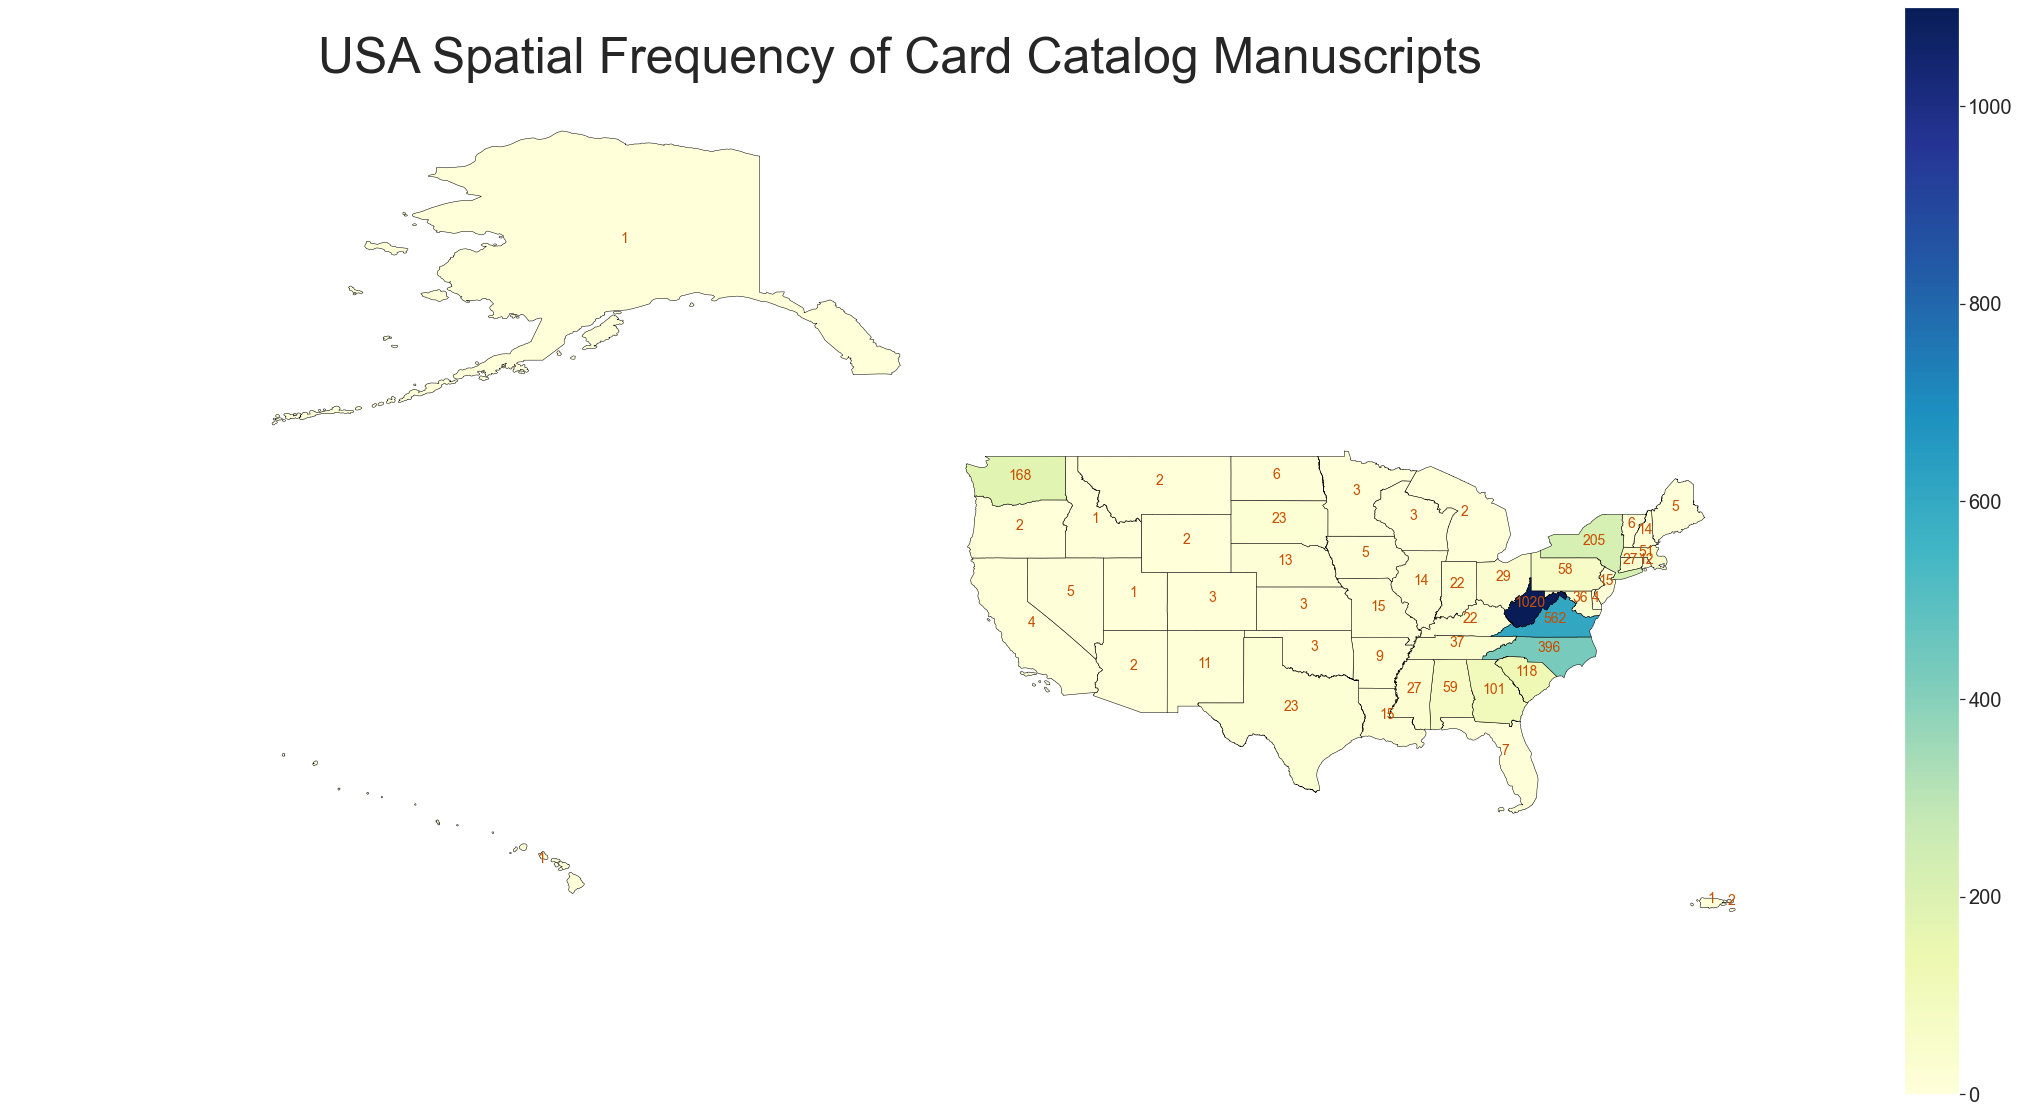

In [46]:
# Print initial heatmap---code adapted from article linked above
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title("USA Spatial Frequency of Card Catalog Manuscripts", fontdict={'fontsize': '50', 'fontweight' : '3'})

color = 'YlGnBu'
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=0, vmax=1100))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
plt.xlim([-200, -60])
plt.ylim([10, 75])

usa.plot('Count', cmap=color, linewidth=0.5, ax=ax, edgecolor="black", figsize=(40, 20))

# Add quantity labels, code adapted from https://stackoverflow.com/questions/38899190/geopandas-label-polygons
usa_nums = usa.copy()
usa_nums['coords'] = usa_nums['geometry'].apply(lambda x: x.centroid.coords[:])
usa_nums['coords'] = [coords[0] for coords in usa_nums['coords']]
# Remove DC to avoid label clashes
usa_nums.drop(usa_nums.index[8], inplace = True)

for index, row in usa_nums.iterrows():
    plt.annotate(text=row['Count'], xy=row['coords'], horizontalalignment='center', color='#C84E00', 
                 fontsize=14)

Based on the heat map, we can see that the states with the most hits are West Virginia, Virginia, and North Carolina. New York, South Carolina, and Georgia are also decently common. Washington is also up there, although this may be false hits for the name "Washington" instead of the location. It seems that every state has at least one card detailing a collection which originated from it. There are some odd outliers here e.g., why is North Carolina not the most represented state? Perhaps NC originating cards were labeled with county instead of state, let's check it out.

## Spatial Frequency Map by N.C. County

In [20]:
# Read in NC county shapefile
nc = gpd.read_file('nc_counties/nc_covid.shp')
nc.drop(['cases', 'deaths', 'case100', 'death100'], axis=1, inplace=True)

In [21]:
# Dictionary of NC county names

counties = {
    "Alamance County": 0,
    "Alexander County": 0,
    "Alexander County": 0,
    "Alleghany County": 0,
    "Anson County": 0,
    "Ashe County": 0,
    "Avery County": 0,
    "Beaufort County": 0,
    "Bertie County": 0,
    "Bladen County": 0,
    "Brunswick County": 0,
    "Buncombe County": 0,
    "Burke County": 0,
    "Cabarrus County": 0,
    "Caldwell County": 0,
    "Camden County": 0,
    "Carteret County": 0,
    "Caswell County": 0,
    "Catawba County": 0,
    "Chatham County": 0,
    "Cherokee County": 0,
    "Chowan County": 0,
    "Clay County": 0,
    "Cleveland County": 0,
    "Columbus County": 0,
    "Craven County": 0,
    "Cumberland County": 0,
    "Currituck County": 0,
    "Dare County": 0,
    "Davidson County": 0,
    "Davie County": 0,
    "Duplin County": 0,
    "Durham County": 0,
    "Edgecombe County": 0,
    "Forsyth County": 0,
    "Franklin County": 0,
    "Gaston County": 0,
    "Gates County": 0,
    "Graham County": 0,
    "Granville County": 0,
    "Greene County": 0,
    "Guilford County": 0,
    "Halifax County": 0,
    "Harnett County": 0,
    "Haywood County": 0,
    "Henderson County": 0,
    "Hertford County": 0,
    "Hoke County": 0,
    "Hyde County": 0,
    "Iredell County": 0,
    "Jackson County": 0,
    "Johnston County": 0,
    "Jones County": 0,
    "Lee County": 0,
    "Lenoir County": 0,
    "Lincoln County": 0,
    "Macon County": 0,
    "Madison County": 0,
    "Martin County": 0,
    "McDowell County": 0,
    "Mecklenburg County": 0,
    "Mitchell County": 0,
    "Montgomery County": 0,
    "Moore County": 0,
    "Nash County": 0,
    "New Hanover County": 0,
    "Northampton County": 0,
    "Onslow County": 0,
    "Orange County": 0,
    "Pamlico County": 0,
    "Pasquotank County": 0,
    "Pender County": 0,
    "Perquimans County": 0,
    "Person County": 0,
    "Pitt County": 0,
    "Polk County": 0,
    "Randolph County": 0,
    "Richmond County": 0,
    "Robeson County": 0,
    "Rockingham County": 0,
    "Rowan County": 0,
    "Rutherford County": 0,
    "Sampson County": 0,
    "Scotland County": 0,
    "Stanly County": 0,
    "Stokes County": 0,
    "Surry County": 0,
    "Swain County": 0,
    "Transylvania County": 0,
    "Tyrrell County": 0,
    "Union County": 0,
    "Vance County": 0,
    "Wake County": 0,
    "Warren County": 0,
    "Washington County": 0,
    "Watauga County": 0,
    "Wayne County": 0,
    "Wilkes County": 0,
    "Wilson County": 0,
    "Yadkin County": 0,
    "Yancey County": 0,
}

In [23]:
# Collect county card counts
# Function to check if location is a county and add to counts
def find_county(c):
    # Check in list of counties
    for key in counties:
        if c == key or c.strip(".") == key.rstrip("unty"):
            counties[key] = counties.get(key) + 1
            continue
    
# Loop through each main entry and try to gather location
for index, row in df.iterrows():
    if row['Coll_head'] == 1:
        # Try to get county name
        locs = str(row['Loc']).split(",")
        if len(locs) < 1:
            continue
        else:
            for i in range(0, len(locs)):
                find_county(locs[i])
            
print(counties)

{'Alamance County': 12, 'Alexander County': 4, 'Alleghany County': 0, 'Anson County': 14, 'Ashe County': 0, 'Avery County': 0, 'Beaufort County': 22, 'Bertie County': 18, 'Bladen County': 6, 'Brunswick County': 26, 'Buncombe County': 20, 'Burke County': 14, 'Cabarrus County': 10, 'Caldwell County': 4, 'Camden County': 0, 'Carteret County': 0, 'Caswell County': 20, 'Catawba County': 6, 'Chatham County': 22, 'Cherokee County': 10, 'Chowan County': 10, 'Clay County': 2, 'Cleveland County': 4, 'Columbus County': 0, 'Craven County': 10, 'Cumberland County': 8, 'Currituck County': 0, 'Dare County': 2, 'Davidson County': 16, 'Davie County': 6, 'Duplin County': 2, 'Durham County': 60, 'Edgecombe County': 10, 'Forsyth County': 8, 'Franklin County': 30, 'Gaston County': 4, 'Gates County': 0, 'Graham County': 0, 'Granville County': 34, 'Greene County': 10, 'Guilford County': 16, 'Halifax County': 50, 'Harnett County': 10, 'Haywood County': 4, 'Henderson County': 2, 'Hertford County': 4, 'Hoke Cou

In [24]:
# Add county counts to geo dataframe
vals = counties.values()
nc['Count'] = vals

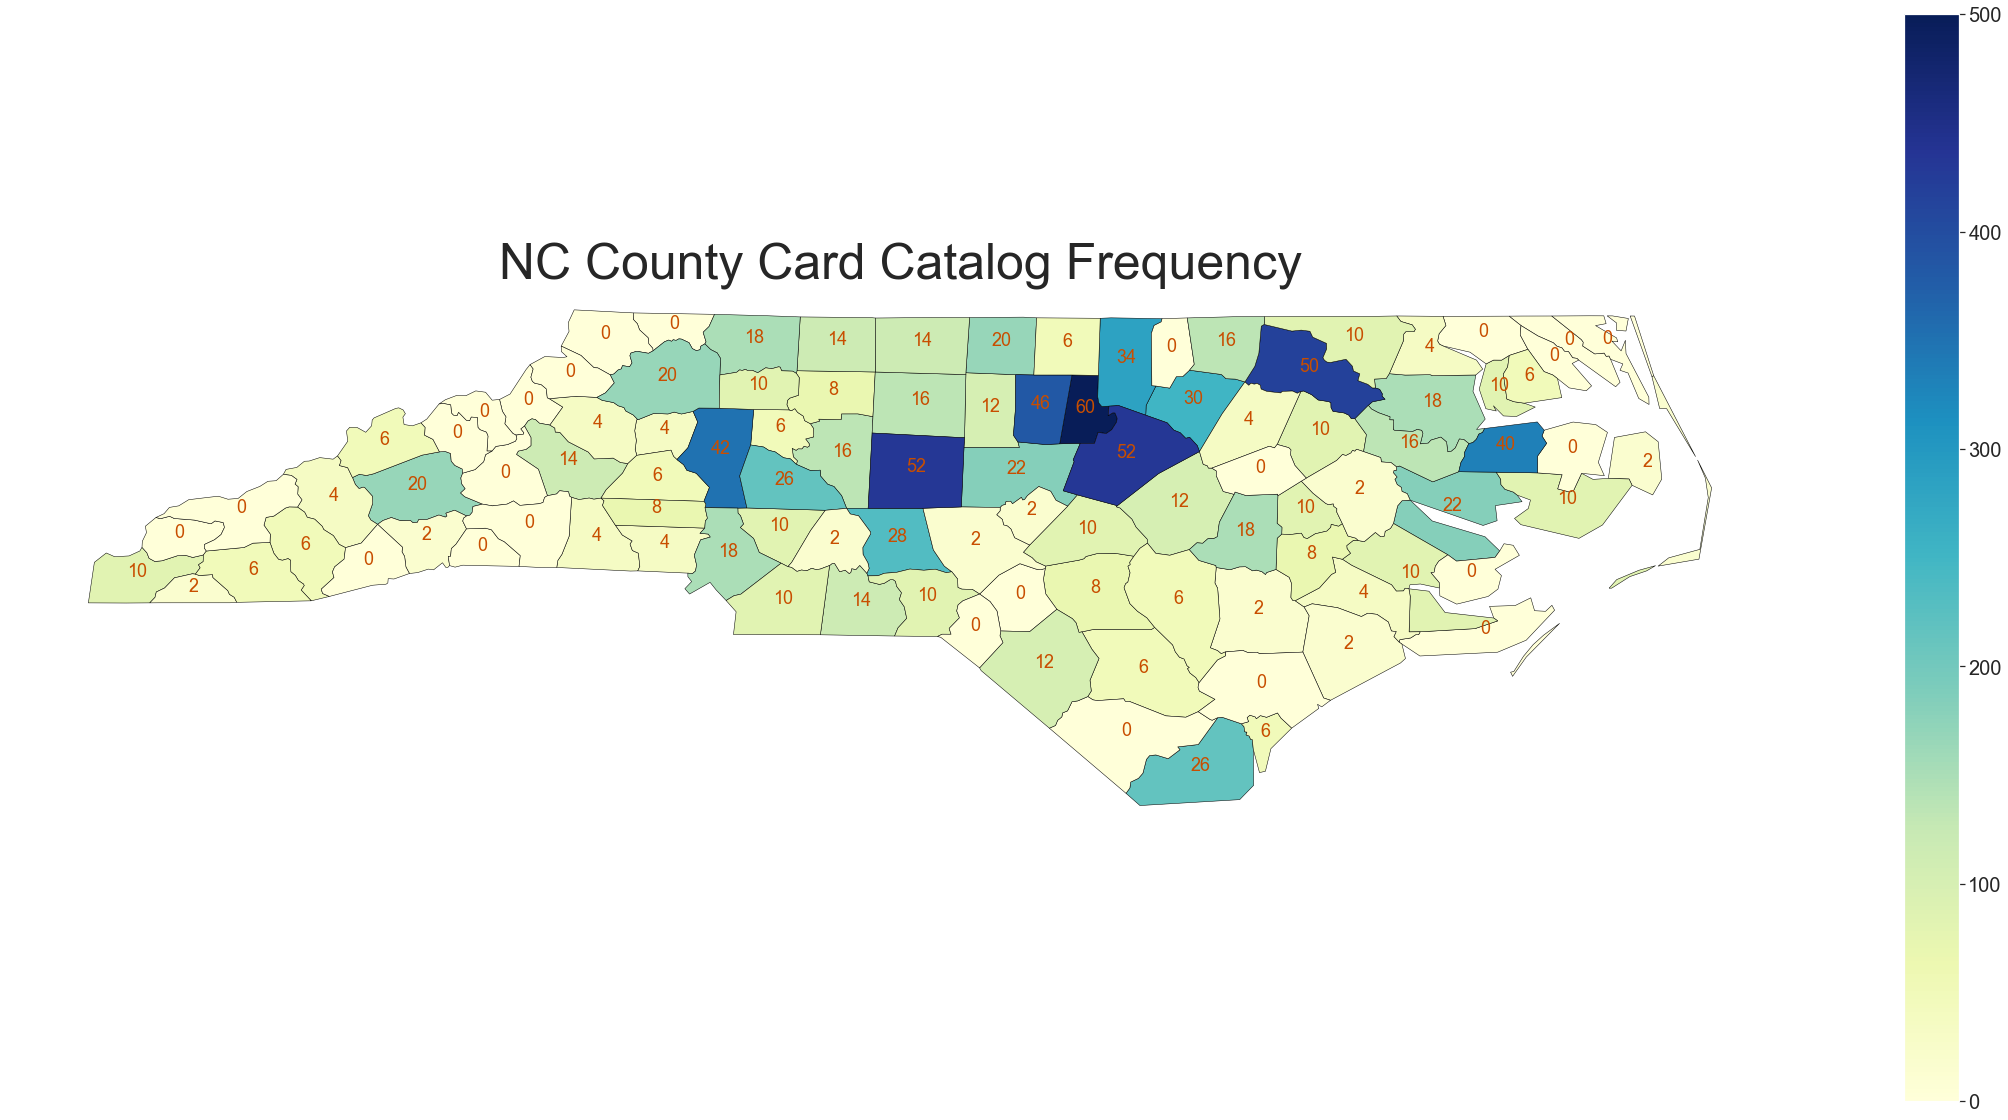

In [25]:
# Print nc county heatmap---code adapted from article linked above
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title("NC County Card Catalog Frequency", fontdict={'fontsize': '50', 'fontweight' : '3'})

color = 'YlGnBu'
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=0, vmax=500))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

nc.plot('Count', cmap=color, linewidth=0.5, ax=ax, edgecolor="black", figsize=(40, 20))

# Add quantity labels, code adapted from https://stackoverflow.com/questions/38899190/geopandas-label-polygons
nc_nums = nc.copy()
nc_nums['coords'] = nc_nums['geometry'].apply(lambda x: x.centroid.coords[:])
nc_nums['coords'] = [coords[0] for coords in nc_nums['coords']]

for index, row in nc_nums.iterrows():
    plt.annotate(text=row['Count'], xy=row['coords'], horizontalalignment='center', color='#C84E00', 
                 fontsize=18)

In [26]:
nc_count = 0
for key in counties:
    nc_count += counties.get(key)
    
print(nc_count)

1080


When we add up all the county collection counts up, we get 1,080 cards cataloging collections that are from North Carolina. That's a lot more than the number we got from just checking by state (396), and supports our hypothesis that North Carolina would have the most collections and that--since the library is located in NC--the state may be implied and not been typed on the cards along with the county. It looks like there are a lot of cards from Durham County--which makes sense because the Rubenstein Library is located in it--as well as Washington County--perhaps the cause of the higher number of cards "from Washington state"--along with other counties that border Durham.

## International Country Counts

We've seen where the cards in the United States hail from, but what about the rest of the world? Let's see how many cards we have from other countries.

In [14]:
# Dictionary of all countries

countries = {
    "Afghanistan": 0,
    "Albania": 0,
    "Algeria": 0,
    "Andorra": 0,
    "Angola": 0,
    "Antigua and Barbuda": 0,
    "Argentina": 0,
    "Armenia": 0,
    "Australia": 0,
    "Austria": 0,
    "Azerbaijan": 0,
    "The Bahamas": 0,
    "Bahrain": 0,
    "Bangladesh": 0,
    "Barbados": 0,
    "Belarus": 0,
    "Belgium": 0,
    "Belize": 0,
    "Benin": 0,
    "Bhutan": 0,
    "Bolivia": 0,
    "Bosnia and Herzegovina": 0,
    "Botswana": 0,
    "Brazil": 0,
    "Brunei": 0,
    "Bulgaria": 0,
    "Burkina Faso": 0,
    "Burundi": 0,
    "Cabo Verde": 0,
    "Cambodia": 0,
    "Cameroon": 0,
    "Canada": 0,
    "Central African Republic": 0,
    "Chad": 0,
    "Chile": 0,
    "China": 0,
    "Colombia": 0,
    "Comoros": 0,
    "Congo, Democratic Republic of the": 0,
    "Congo, Republic of the": 0,
    "Costa Rica": 0,
    "Côte d’Ivoire": 0,
    "Croatia": 0,
    "Cuba": 0,
    "Cyprus": 0,
    "Czech Republic": 0,
    "Denmark": 0,
    "Djibouti": 0,
    "Dominica": 0,
    "Dominican Republic": 0,
    "East Timor (Timor-Leste)": 0,
    "Ecuador": 0,
    "Egypt": 0,
    "El Salvador": 0,
    "Equatorial Guinea": 0,
    "Eritrea": 0,
    "Estonia": 0,
    "Eswatini": 0,
    "Ethiopia": 0,
    "Fiji": 0,
    "Finland": 0,
    "France": 0,
    "Gabon": 0,
    "The Gambia": 0,
    "Georgia": 0,
    "Germany": 0,
    "Ghana": 0,
    "Greece": 0,
    "Grenada": 0,
    "Guatemala": 0,
    "Guinea": 0,
    "Guinea-Bissau": 0,
    "Guyana": 0,
    "Haiti": 0,
    "Honduras": 0,
    "Hungary": 0,
    "Iceland": 0,
    "India": 0,
    "Indonesia": 0,
    "Iran": 0,
    "Iraq": 0,
    "Ireland": 0,
    "Israel": 0,
    "Italy": 0,
    "Jamaica": 0,
    "Japan": 0,
    "Jordan": 0,
    "Kazakhstan": 0,
    "Kenya": 0,
    "Kiribati": 0,
    "Korea, North": 0,
    "Korea, South": 0,
    "Kosovo": 0,
    "Kuwait": 0,
    "Kyrgyzstan": 0,
    "Laos": 0,
    "Latvia": 0,
    "Lebanon": 0,
    "Lesotho": 0,
    "Liberia": 0,
    "Libya": 0,
    "Liechtenstein": 0,
    "Lithuania": 0,
    "Luxembourg": 0,
    "Madagascar": 0,
    "Malawi": 0,
    "Malaysia": 0,
    "Maldives": 0,
    "Mali": 0,
    "Malta": 0,
    "Marshall Islands": 0,
    "Mauritania": 0,
    "Mauritius": 0,
    "Mexico": 0,
    "Micronesia, Federated States of": 0,
    "Moldova": 0,
    "Monaco": 0,
    "Mongolia": 0,
    "Montenegro": 0,
    "Morocco": 0,
    "Mozambique": 0,
    "Myanmar (Burma)": 0,
    "Namibia": 0,
    "Nauru": 0,
    "Nepal": 0,
    "Netherlands": 0,
    "New Zealand": 0,
    "Nicaragua": 0,
    "Niger": 0,
    "Nigeria": 0,
    "North Macedonia": 0,
    "Norway": 0,
    "Oman": 0,
    "Pakistan": 0,
    "Palau": 0,
    "Panama": 0,
    "Papua New Guinea": 0,
    "Paraguay": 0,
    "Peru": 0,
    "Philippines": 0,
    "Poland": 0,
    "Portugal": 0,
    "Qatar": 0,
    "Romania": 0,
    "Russia": 0,
    "Rwanda": 0,
    "Saint Kitts and Nevis": 0,
    "Saint Lucia": 0,
    "Saint Vincent and the Grenadines": 0,
    "Samoa": 0,
    "San Marino": 0,
    "Sao Tome and Principe": 0,
    "Saudi Arabia": 0,
    "Senegal": 0,
    "Serbia": 0,
    "Seychelles": 0,
    "Sierra Leone": 0,
    "Singapore": 0,
    "Slovakia": 0,
    "Slovenia": 0,
    "Solomon Islands": 0,
    "Somalia": 0,
    "South Africa": 0,
    "Spain": 0,
    "Sri Lanka": 0,
    "Sudan": 0,
    "Sudan, South": 0,
    "Suriname": 0,
    "Sweden": 0,
    "Switzerland": 0,
    "Syria": 0,
    "Taiwan": 0,
    "Tajikistan": 0,
    "Tanzania": 0,
    "Thailand": 0,
    "Togo": 0,
    "Tonga": 0,
    "Trinidad and Tobago": 0,
    "Tunisia": 0,
    "Turkey": 0,
    "Turkmenistan": 0,
    "Tuvalu": 0,
    "Uganda": 0,
    "Ukraine": 0,
    "United Arab Emirates": 0,
    "United Kingdom": 0,
    "United States": 0,
    "Uruguay": 0,
    "Uzbekistan": 0,
    "Vanuatu": 0,
    "Vatican City": 0,
    "Venezuela": 0,
    "Vietnam": 0,
    "Yemen": 0,
    "Zambia": 0,
    "Zimbabwe": 0,
}

In [15]:
# Collect country card counts
# Function to check if location is a country and add to counts
def find_country(c):
    # Check in list of countries
    for key in countries:
        if c.strip(".") == key:
            countries[key] = countries.get(key) + 1
            continue
    
# Loop through each main entry and try to gather location
for index, row in df.iterrows():
    if row['Coll_head'] == 1:
        # Try to get county name
        locs = str(row['Loc']).split(",")
        if len(locs) < 1:
            continue
        else:
            for i in range(0, len(locs)):
                find_country(locs[i])

In [19]:
for country in countries:
    if countries.get(country) > 0:
        print(country, countries.get(country))

Australia 1
Austria 3
Belgium 1
Brazil 8
Canada 1
Chile 1
China 5
Colombia 1
Cuba 4
Denmark 4
Egypt 3
Fiji 1
France 47
Georgia 81
Germany 30
Greece 3
Grenada 2
Guatemala 1
India 25
Indonesia 1
Iran 1
Ireland 4
Israel 2
Italy 3
Jamaica 3
Japan 9
Jordan 13
Lebanon 2
Liberia 1
Madagascar 1
Malta 2
Mexico 8
Morocco 1
New Zealand 1
Peru 5
Philippines 3
Poland 4
Russia 1
San Marino 1
South Africa 4
Spain 22
Suriname 1
Sweden 2
Switzerland 5
Syria 1
Thailand 1
Tunisia 1
Turkey 3
United States 46
Vietnam 3


Looks like we have cards from several different countries, although not all of these are likely accurate. For example, most if not all of the Georgia hits are probably in regards to the state Georgia and not the country Georgia and thousands of collections are from the United States, but do not say so as it is implied.

## TODO: Explore Frequent Non-N.C. States

## TODO: Qualitative Analysis of Outliers

In [ ]:
## Word cloud by state?